In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('house.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:
df = df[['GrLivArea', 'YearBuilt', 'GarageCars',
         'TotalBsmtSF', 'FullBath', 'OverallQual', 'Neighborhood', 'SalePrice']]

In [ ]:
df.to_csv('data_clean.csv', index=False)

In [ ]:
count_nei = df['Neighborhood'].nunique()
print(f'Количество уникальных районов: {count_nei}')

Количество уникальных районов: 25


In [ ]:
df.groupby('Neighborhood')['SalePrice'].mean().round().sort_values(ascending=False).head(5)

,SalePrice
Neighborhood,
NoRidge,335295.0
NridgHt,316271.0
StoneBr,310499.0
Timber,242247.0
Veenker,238773.0


In [ ]:
count_year = (df['YearBuilt'] > 2000).sum()
print(f'Количество домов построенных после 2000-года: {count_year}')

Количество домов построенных после 2000-года: 364


In [ ]:
df.groupby('OverallQual')['GrLivArea'].mean().round()

,GrLivArea
OverallQual,
1,619.0
2,573.0
3,1119.0
4,1107.0
5,1251.0
6,1466.0
7,1704.0
8,1948.0
9,2078.0


In [ ]:
count_zero = (df['TotalBsmtSF'] == 0).sum()
count_zero

np.int64(37)

In [ ]:
total_house = df['TotalBsmtSF'].shape[0]

In [ ]:
print(f'{round((count_zero * 100) / total_house, 2)} %')

2.53 %


In [ ]:
df.groupby('GarageCars')['SalePrice'].mean().round()

,SalePrice
GarageCars,
0,103317.0
1,128117.0
2,183852.0
3,309636.0
4,192656.0


In [ ]:
count_bath = (df['FullBath'] > 2).sum()
print(f'Количество домов, которые имеют больше 2-х ванных комнат: {count_bath}')

Количество домов, которые имеют больше 2-х ванных комнат: 33


In [ ]:
df['Neighborhood'].value_counts().head(1)

,count
Neighborhood,
NAmes,225


In [ ]:
new_df = df[['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars', 'SalePrice']]
new_df.corr()

,GrLivArea,TotalBsmtSF,OverallQual,GarageCars,SalePrice
GrLivArea,1.000000,0.454868,0.593007,0.467247,0.708624
TotalBsmtSF,0.454868,1.000000,0.537808,0.434585,0.613581
OverallQual,0.593007,0.537808,1.000000,0.600671,0.790982
GarageCars,0.467247,0.434585,0.600671,1.000000,0.640409
SalePrice,0.708624,0.613581,0.790982,0.640409,1.000000


In [ ]:
mean_sale = (df.groupby('GarageCars', as_index=False)['SalePrice'].mean())
mean_sale['SalePrice'] = mean_sale['SalePrice'].round()

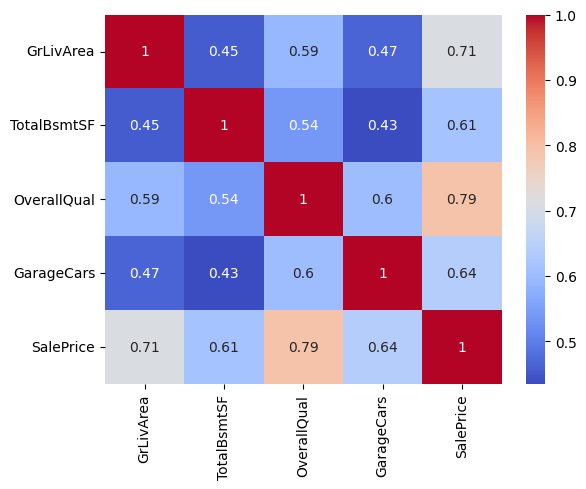

In [ ]:
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
rating_df = df.groupby('Neighborhood')['SalePrice'].mean().round().sort_values(ascending=False)
rating_df.to_csv('rating.csv')

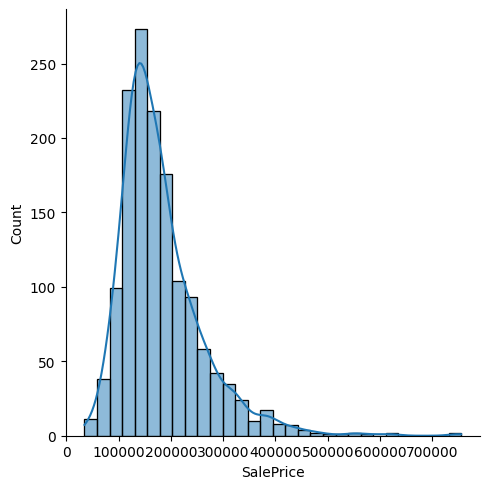

In [ ]:
sns.displot(df['SalePrice'], bins=30, kde=True)
plt.show()

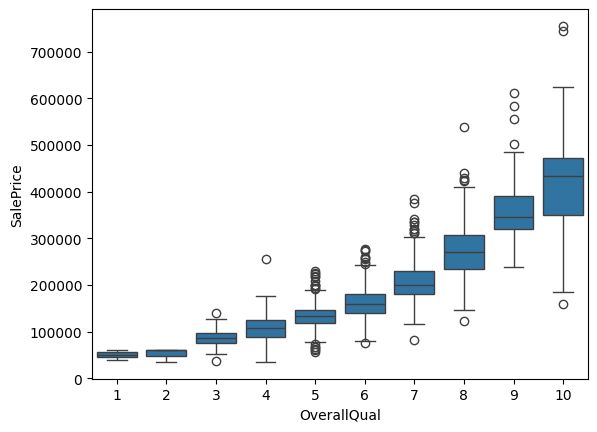

In [ ]:
sns.boxplot(data=df, x='OverallQual', y='SalePrice')
plt.show()

/tmp/ipython-input-1059692269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='SalePrice', y='Neighborhood', split=True, palette=['red', 'aqua'])
/tmp/ipython-input-1059692269.py:2: UserWarning: 
The palette list has fewer values (2) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df, x='SalePrice', y='Neighborhood', split=True, palette=['red', 'aqua'])


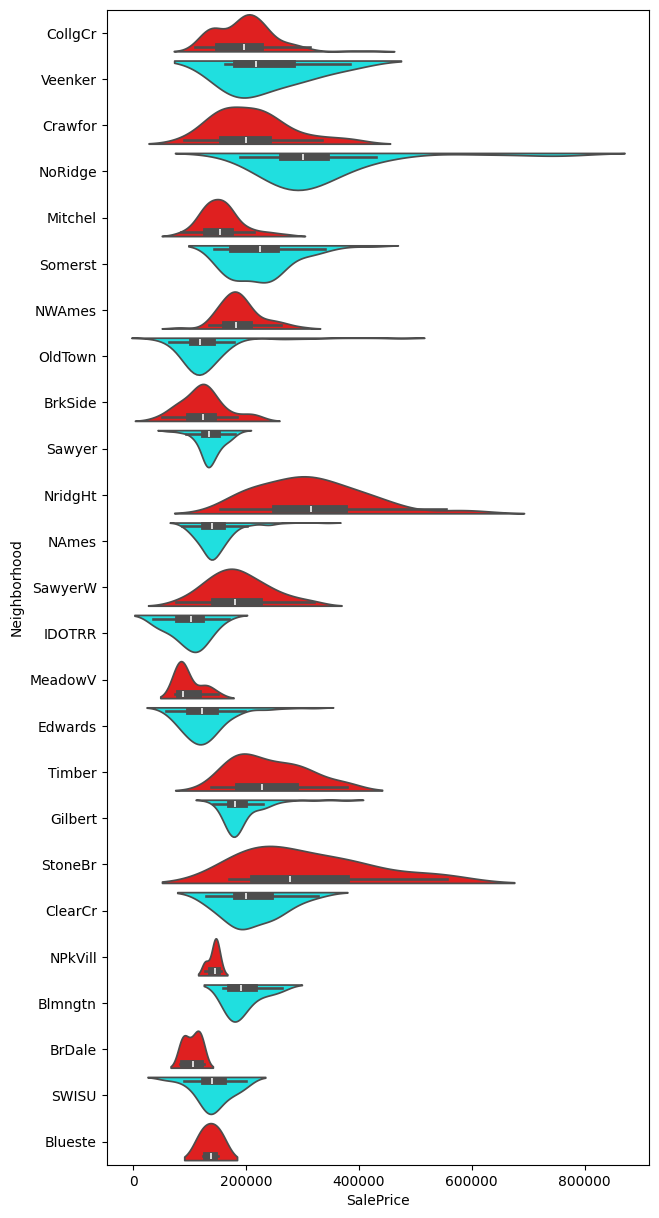

In [ ]:
plt.figure(figsize=(7, 15))
sns.violinplot(data=df, x='SalePrice', y='Neighborhood', split=True, palette=['red', 'aqua'])
plt.show()

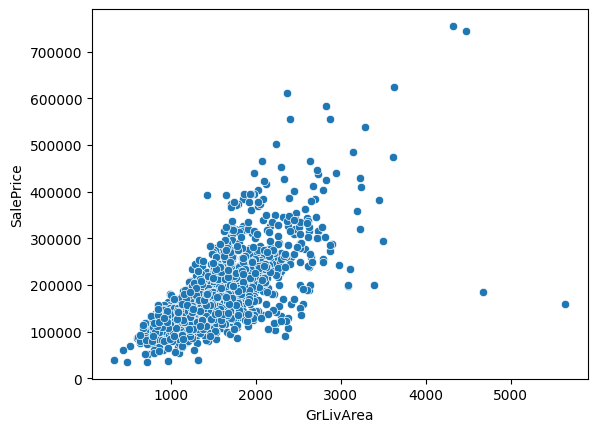

In [ ]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.show()

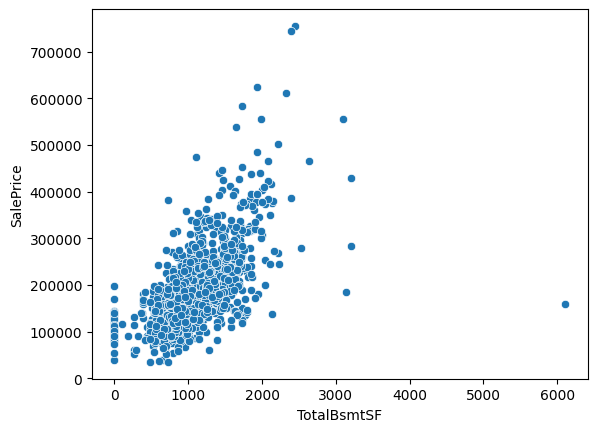

In [ ]:
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')
plt.show()

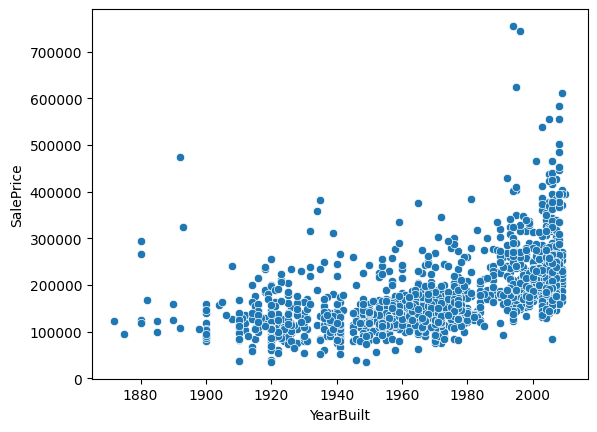

In [ ]:
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice')
plt.show()

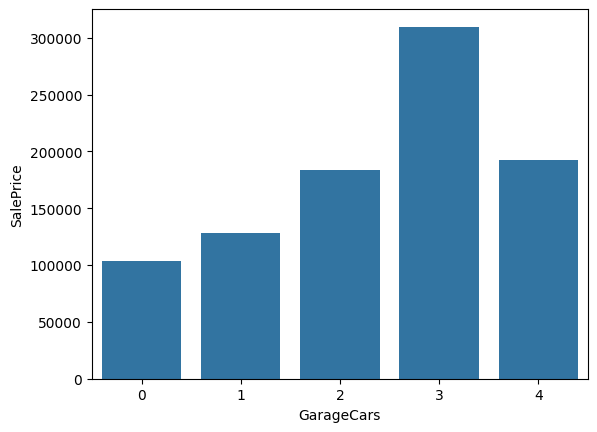

In [ ]:
sns.barplot(data=mean_sale, x='GarageCars', y='SalePrice')
plt.show()

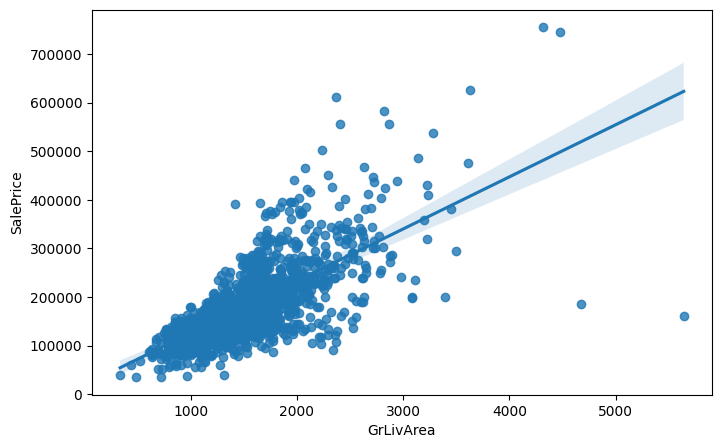

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='GrLivArea', y='SalePrice')
plt.show()

In [ ]:
cols = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'Garage']

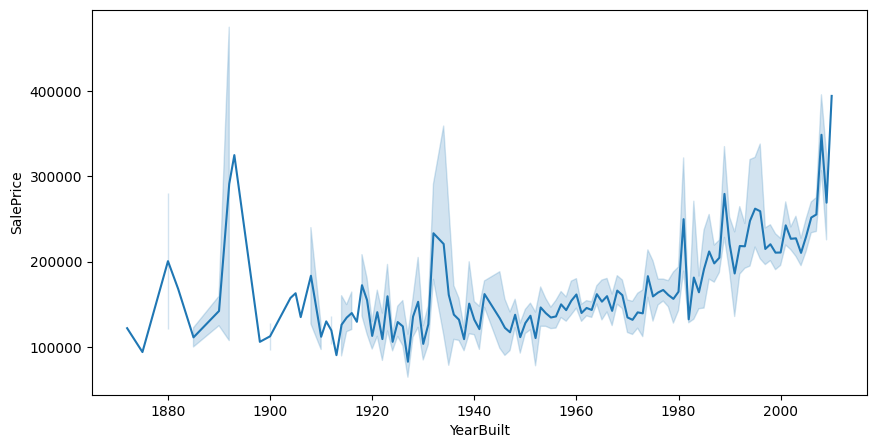

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='YearBuilt', y='SalePrice')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True).astype(int)

In [ ]:
df

,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,OverallQual,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1710,2003,2,856,2,7,208500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1262,1976,2,1262,2,6,181500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1786,2001,2,920,2,7,223500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1717,1915,3,756,1,7,140000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2198,2000,3,1145,2,8,250000,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,1999,2,953,2,6,175000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,2073,1978,2,1542,2,6,210000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,2340,1941,1,1152,2,7,266500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,1078,1950,1,1078,1,5,142125,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df.drop(columns=('SalePrice'))
scaled_data = scaler.fit_transform(features)
scaled_data

array([[ 0.37033344,  1.05099379,  0.31172464, ..., -0.13199092,
        -0.16347148, -0.08712888],
       [-0.48251191,  0.15673371,  0.31172464, ..., -0.13199092,
        -0.16347148, 11.47725023],
       [ 0.51501256,  0.9847523 ,  0.31172464, ..., -0.13199092,
        -0.16347148, -0.08712888],
       ...,
       [ 1.56964722, -1.00249232, -1.02685765, ..., -0.13199092,
        -0.16347148, -0.08712888],
       [-0.83278768, -0.70440562, -1.02685765, ..., -0.13199092,
        -0.16347148, -0.08712888],
       [-0.49393395, -0.20759447, -1.02685765, ..., -0.13199092,
        -0.16347148, -0.08712888]])

In [ ]:
x = scaled_data
y = df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
lin_model = LinearRegression()

In [ ]:
lin_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8267380266474198

In [ ]:
import joblib
joblib.dump(lin_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   GrLivArea             1460 non-null   int64
 1   YearBuilt             1460 non-null   int64
 2   GarageCars            1460 non-null   int64
 3   TotalBsmtSF           1460 non-null   int64
 4   FullBath              1460 non-null   int64
 5   OverallQual           1460 non-null   int64
 6   SalePrice             1460 non-null   int64
 7   Neighborhood_Blueste  1460 non-null   int64
 8   Neighborhood_BrDale   1460 non-null   int64
 9   Neighborhood_BrkSide  1460 non-null   int64
 10  Neighborhood_ClearCr  1460 non-null   int64
 11  Neighborhood_CollgCr  1460 non-null   int64
 12  Neighborhood_Crawfor  1460 non-null   int64
 13  Neighborhood_Edwards  1460 non-null   int64
 14  Neighborhood_Gilbert  1460 non-null   int64
 15  Neighborhood_IDOTRR   1460 non-null   int64
 16  Neighb

In [ ]:
# lis = []
# for i in df:
#   aga = db = 'Neighborhood_'
#   if subword in i:
#   lis.append(i[len(subword):])
# print (lis)
li = []
for i in df:
  subword = 'Neighborhood_'
  if subword in i:
    li.append(i[len(subword):])
print (li)

['Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [ ]:
df.describe().round()

,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,OverallQual,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,1515.0,1971.0,2.0,1057.0,2.0,6.0,180921.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,525.0,30.0,1.0,439.0,1.0,1.0,79443.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,334.0,1872.0,0.0,0.0,0.0,1.0,34900.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1130.0,1954.0,1.0,796.0,1.0,5.0,129975.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1464.0,1973.0,2.0,992.0,2.0,6.0,163000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1777.0,2000.0,2.0,1298.0,2.0,7.0,214000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5642.0,2010.0,4.0,6110.0,3.0,10.0,755000.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.head(10)

,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,OverallQual,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1710,2003,2,856,2,7,208500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1262,1976,2,1262,2,6,181500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1786,2001,2,920,2,7,223500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1717,1915,3,756,1,7,140000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2198,2000,3,1145,2,8,250000,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1362,1993,2,796,1,5,143000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1694,2004,2,1686,2,8,307000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,2090,1973,2,1107,2,7,200000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1774,1931,2,952,2,7,129900,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1077,1939,1,991,1,5,118000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
